<a href="https://colab.research.google.com/github/Ymy9he/group23/blob/main/finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [276]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.utils import resample
import seaborn as sns


In [277]:
# read in the data
#df_train =pd.read_csv('/content/training_data.csv.crdownload')
#df_test =pd.read_csv('/content/testing_data.csv.crdownload')


#https://stackoverflow.com/questions/55240330/how-to-read-csv-file-from-github-using-pandas

url_test = 'https://raw.githubusercontent.com/DS3001/group23/main/project_2/data/testing_data.csv'
url_train = 'https://raw.githubusercontent.com/DS3001/group23/main/project_2/data/training_data.csv'

df_test = pd.read_csv(url_test, index_col=0)
df_train = pd.read_csv(url_train, index_col=0)

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


In [278]:
df_test.head()
df_train.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,68685,Male,36.0,0,0,Yes,Govt_job,Urban,65.87,32.2,formerly smoked,0
1,59058,Female,45.0,0,0,Yes,Govt_job,Rural,68.66,25.3,never smoked,0
2,46068,Male,58.0,0,0,No,Self-employed,Rural,170.93,30.7,Unknown,0
3,36837,Female,61.0,0,0,Yes,Self-employed,Urban,69.88,27.1,never smoked,0
4,30550,Female,78.0,0,0,No,Private,Urban,103.86,30.6,Unknown,0


In [279]:
unique_columns = df_train.columns.tolist()
print(unique_columns)
unique_columns2 = df_test.columns.tolist()
print(unique_columns2)

['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


<AxesSubplot:>

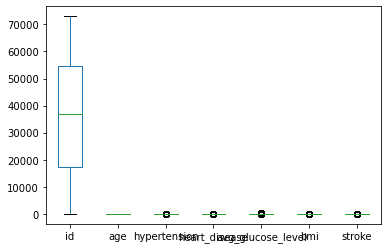

In [280]:
df_train.plot.box()


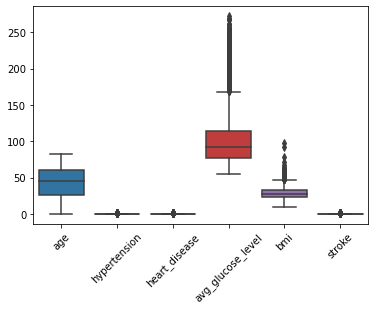

In [281]:
import matplotlib.pyplot as plt
import seaborn as sns

df_train = df_train.drop('id', axis=1)

ax = sns.boxplot(data=df_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels

plt.show()  # Show the boxplot
# avg glucose has a lot of outliers, so does bmi 

<AxesSubplot:>

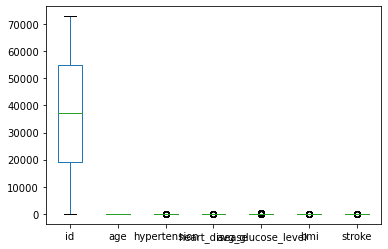

In [282]:
df_test.plot.box()


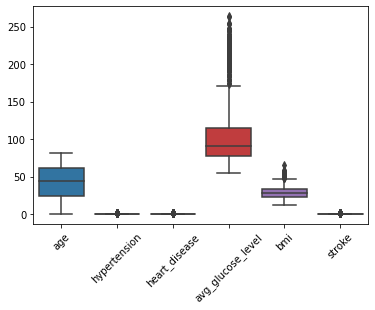

In [283]:
import matplotlib.pyplot as plt
import seaborn as sns

df_test = df_test.drop('id', axis=1)

ax = sns.boxplot(data=df_test)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels

plt.show()  # Show the boxplot
# avg glucose has a lot of outliers, so does bmi 

In [284]:
missing_values = df_train.isnull().sum()
print("Missing Values:")
print(missing_values) # 159


Missing Values:
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  159
smoking_status         0
stroke                 0
dtype: int64


In [285]:
missing_values = df_test.isnull().sum()
print("Missing Values:")
print(missing_values) # 42

Missing Values:
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  42
smoking_status        0
stroke                0
dtype: int64


In [286]:
df_train['bmi'].fillna(df_train['bmi'].mean(), inplace=True)
df_test['bmi'].fillna(df_test['bmi'].mean(), inplace=True)

In [287]:
df_train.isnull().sum() # No more NA Values
df_test.isnull().sum() # No more NA Values

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

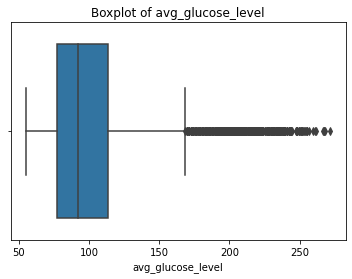

In [288]:
# Create box plots for avg_glucose_level
sns.boxplot(x=df_train['avg_glucose_level'])
plt.title('Boxplot of avg_glucose_level')
plt.show()

In [289]:
#df_train['avg_glucose_level'] = np.log1p(df_train['avg_glucose_level']) # didnt work
import numpy as np

## Function to compute whiskers:
def windsorize(x): # top of model_evaulation notes
    # Compute IQR and 1st,3rd quantiles
    pct25, pct75 = np.percentile(x,[25,75])
    iqr = pct75 - pct25
    # Compute whiskers:
    lower_whisker = pct25 - iqr*1.5
    upper_whisker = pct75 + iqr*1.5
    # Windsorize x:
    x_windsor = x
    x_windsor[ x < lower_whisker ] = lower_whisker
    x_windsor[ x > upper_whisker ] = upper_whisker
    return(x_windsor)

df_train['avg_glucose_level'] = windsorize(df_train['avg_glucose_level'])


<ipython-input-289-a095c8565a5f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[ x < lower_whisker ] = lower_whisker
<ipython-input-289-a095c8565a5f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[ x > upper_whisker ] = upper_whisker


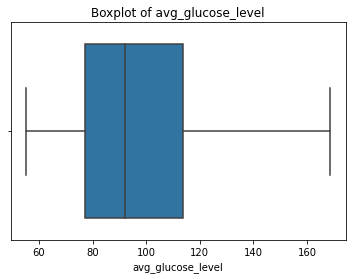

In [290]:
sns.boxplot(x=df_train['avg_glucose_level'])
plt.title('Boxplot of avg_glucose_level')
plt.show()

In [291]:
df_test['avg_glucose_level'] = windsorize(df_test['avg_glucose_level'])


<ipython-input-289-a095c8565a5f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[ x < lower_whisker ] = lower_whisker
<ipython-input-289-a095c8565a5f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[ x > upper_whisker ] = upper_whisker


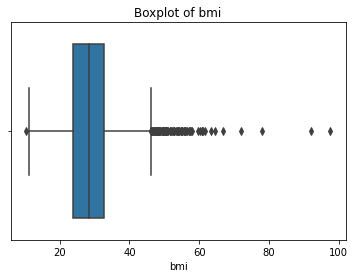

In [292]:
sns.boxplot(x=df_train['bmi'])
plt.title('Boxplot of bmi')
plt.show()

In [293]:
df_test['bmi'] = windsorize(df_test['bmi'])
df_train['bmi'] = windsorize(df_train['bmi'])


<ipython-input-289-a095c8565a5f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[ x < lower_whisker ] = lower_whisker
<ipython-input-289-a095c8565a5f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[ x > upper_whisker ] = upper_whisker
<ipython-input-289-a095c8565a5f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[ x < lower_whisker ] = lower_whisker
<ipython-input-289-a095c8565a5f>:15: SettingWithC

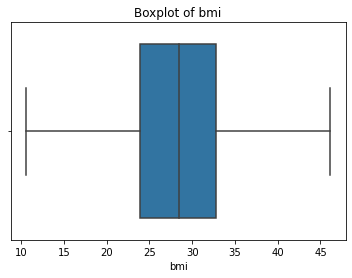

In [294]:
sns.boxplot(x=df_train['bmi'])
plt.title('Boxplot of bmi')
plt.show()

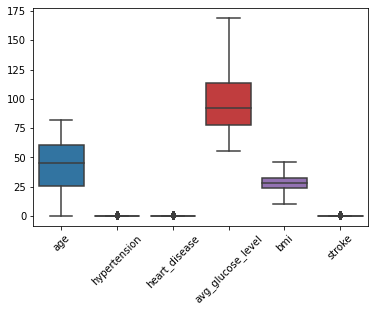

In [295]:

ax = sns.boxplot(data=df_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels

plt.show()  # Show the boxplot
# outliers fone, glucose one whisker is much longer than the other,

In [296]:
print(df_test['work_type'].unique())

['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


In [297]:

df_train["gender_numeric"] = df_train['gender'].replace(['Male','Female','Other'],[0,1,2])
df_test["gender_numeric"] = df_test['gender'].replace(['Male','Female'],[0,1])


In [298]:

print(df_train['gender'].unique())
print(df_train['gender_numeric'].unique())

['Male' 'Female' 'Other']
[0 1 2]


In [299]:
df_train['ever_married_numeric']= df_train['ever_married'].replace(['No','Yes'],[0,1])
df_test['ever_married_numeric']= df_test['ever_married'].replace(['No','Yes'],[0,1])


In [300]:
df_train['Residence_type_numeric']=df_train['Residence_type'].replace(['Urban','Rural'],[0,1])
df_test['Residence_type_numeric']= df_test['Residence_type'].replace(['Urban','Rural'],[0,1])


In [301]:
df_train['smoking_status_numeric']= df_train['smoking_status'].replace(['Unknown','never smoked','formerly smoked','smokes'],[0,1,2,3])
df_test['smoking_status_numeric']= df_test['smoking_status'].replace(['Unknown','never smoked','formerly smoked','smokes'],[0,1,2,3])


In [302]:
df_train['work_type_numeric']= df_train['work_type'].replace(['Never_worked','Private','Self-employed','Govt_job','children'],[0,1,2,3,4])
df_test['work_type_numeric']= df_test['work_type'].replace(['Never_worked','Private','Self-employed','Govt_job','children'],[0,1,2,3,4])

In [303]:
df_train.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_numeric,ever_married_numeric,Residence_type_numeric,smoking_status_numeric,work_type_numeric
0,Male,36.0,0,0,Yes,Govt_job,Urban,65.87,32.2,formerly smoked,0,0,1,0,2,3
1,Female,45.0,0,0,Yes,Govt_job,Rural,68.66,25.3,never smoked,0,1,1,1,1,3
2,Male,58.0,0,0,No,Self-employed,Rural,168.67,30.7,Unknown,0,0,0,1,0,2
3,Female,61.0,0,0,Yes,Self-employed,Urban,69.88,27.1,never smoked,0,1,1,0,1,2
4,Female,78.0,0,0,No,Private,Urban,103.86,30.6,Unknown,0,1,0,0,0,1


In [304]:
#split
y_train = df_train['stroke']
X_train = df_train.drop(["work_type", "Residence_type", "smoking_status", "ever_married", "gender",], axis=1)
X_train = X_train.drop('stroke',axis=1)

#X_train.head()
y_test = df_test['stroke']
X_test = df_test.drop(["work_type", "Residence_type", "smoking_status", "ever_married", "gender",], axis=1)
X_test = X_test.drop('stroke',axis=1)

X_train.dtypes


age                       float64
hypertension                int64
heart_disease               int64
avg_glucose_level         float64
bmi                       float64
gender_numeric              int64
ever_married_numeric        int64
Residence_type_numeric      int64
smoking_status_numeric      int64
work_type_numeric           int64
dtype: object

In [305]:
print(X_train['smoking_status_numeric'])

0       2
1       1
2       0
3       1
4       0
       ..
4082    1
4083    2
4084    1
4085    3
4086    2
Name: smoking_status_numeric, Length: 4087, dtype: int64


In [356]:
#from sklearn.linear_model import LinearRegression as lr

TSS = np.sum((y_test - y_test.mean())**2 )
N_test = len(y_test)

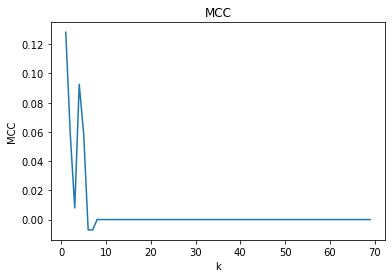

In [357]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import matthews_corrcoef
import numpy as np
import matplotlib.pyplot as plt

# Maxmin normalization function:
def maxmin(z):
    z = (z - min(z)) / (max(z) - min(z))
    return z

# Apply maxmin to each column of X:
X_train_knn = X_train.apply(maxmin)
X_test_knn = X_test.apply(maxmin)

# Determine optimal k:
k_bar = 70
k_grid = np.arange(1, k_bar)
MCC = np.zeros(k_bar-1)

for k in range(k_bar-1):
    model = KNeighborsClassifier(n_neighbors=k+1)
    fitted_model = model.fit(X_train_knn, y_train)
    y_hat = fitted_model.predict(X_test_knn)
    mcc = matthews_corrcoef(y_test, y_hat)
    MCC[k] = mcc

MCC_max = np.max(MCC)
max_index = np.where(MCC == MCC_max)
k_star = k_grid[max_index][0]

## MCC plot:
plt.plot(k_grid, MCC)
plt.xlabel("k")
plt.ylabel("MCC")
plt.title('MCC')
plt.show()

## Fit optimal model:
model = KNeighborsClassifier(n_neighbors=max(3, k_star))
knn_star = model.fit(X_train_knn, y_train)
y_hat_knn = knn_star.predict(X_test_knn)


In [306]:
#from sklearn.linear_model import LinearRegression as lr

#TSS = np.sum((y_test - y_test.mean())**2 )
#N_test = len(y_test)

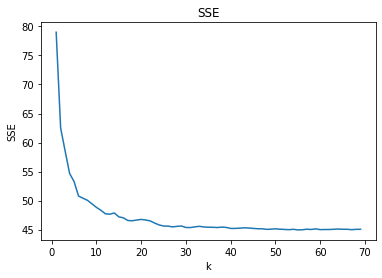

In [358]:
from sklearn.neighbors import KNeighborsRegressor

# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Apply maxmin to each column of X:

X_train_knn = X_train.apply(maxmin)
X_test_knn = X_test.apply(maxmin)

# Determine optimal k:
k_bar = 70
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar-1) # For comparison purposes, store the training error
for k in range(k_bar-1):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train_knn,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test_knn) # Predict values for test set
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index][0] # Find the optimal value of k
## SSE plot:
plt.plot(k_grid,SSE)
plt.xlabel("k")
plt.ylabel("SSE")
plt.title('SSE')
plt.show()

## Fit optimal model:
model = KNeighborsRegressor(n_neighbors=max(3,k_star))
knn_star = model.fit(X_train_knn,y_train)
y_hat_knn = knn_star.predict(X_test_knn)
residuals_knn = y_test - y_hat_knn

# Elbow is about aroun k=5, where it changes sharply... i think

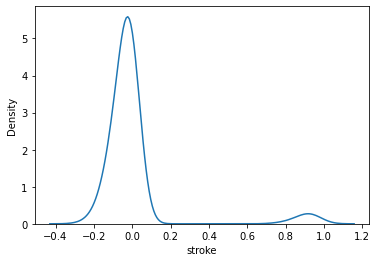

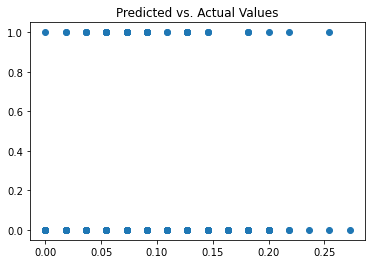

In [359]:
## Residual plot:
sns.kdeplot(residuals_knn)
plt.show()

## True versus predicted plot:
plt.scatter(x=y_hat_knn,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()

## Metrics:
SSE_knn = np.sum( (y_test-y_hat_knn)**2 )
MSE_knn = SSE_knn/N_test
RMSE_knn = (SSE_knn/N_test)**(1/2)
R2_knn = 1 - SSE_knn/TSS

# frist graph shows distribution of the stroke variable, its centered around 0.
#This tells us most people don't have strokes because we see big peak at 0 and small peak at 1

# I dont know how to read second graph

In [360]:
model = KNeighborsClassifier(n_neighbors=5)
fitted_model = model.fit(X_train_knn,y_train) # Train the model on our data
y_hat = fitted_model.predict(X_test_knn) # Predict values for test set
pd.crosstab(y_test, y_hat)

col_0,0,1
stroke,,
0,970,3
1,49,1


In [363]:
from sklearn.metrics import confusion_matrix

# isk what this is
# Create a confusion matrix

tab = pd.crosstab(np.array(y_hat_knn), np.array(y_hat_knn))

print("Confusion Matrix:")
tp = tab.iloc[0,0]
tn = tab.iloc[1,1]
fp = tab.iloc[0,1]
fn = tab.iloc[1,0]
tot = tp+tn+fp+fn
acc = (tp+tn)/tot
spec = tn/(tp+fn)
sens = tp/(tp+fn)
mcc = (tp*tn-fp*fn)/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
    
print({'confusion_matrix':tab,
            'accuracy':acc,
            'specificity':spec,
            'sensitivity':sens,
            'mcc':mcc})

Confusion Matrix:
{'confusion_matrix': col_0     0.000000  0.018182  0.036364  0.054545  0.072727  0.090909  \
row_0                                                                  
0.000000       368         0         0         0         0         0   
0.018182         0       167         0         0         0         0   
0.036364         0         0        92         0         0         0   
0.054545         0         0         0       113         0         0   
0.072727         0         0         0         0        64         0   
0.090909         0         0         0         0         0        69   
0.109091         0         0         0         0         0         0   
0.127273         0         0         0         0         0         0   
0.145455         0         0         0         0         0         0   
0.163636         0         0         0         0         0         0   
0.181818         0         0         0         0         0         0   
0.200000         0       

In [364]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_hat_knn)
print(f"R^2 Score: {r2}")

mse = mean_squared_error(y_test, y_hat_knn)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")


R^2 Score: 0.054738372418947745
RMSE: 0.20962438560742405
